* [1. Importar librerias](#section1)
* [2. Filtrar](#section2)
* [3. Reporte](#section3)
* [3.1 Grafica de desviacion](#section31)
* [3.2 Visualizando las filas y columnas-> completo](#section32)
* [4. Escalamiento](#section4)
* [4.1 Escalamiento por MiN-Max](#section41)
* [4.1.1 El escalador](#section411)
* [4.1.2 Ajustar](#section412)
* [4.1.3 Crear un DataFrame](#section413)
* [4.1.4 Renombrar](#section414)
* [5. Aplicando KMeans](#section12)
* [13. BASICOS](#section13)
* [13.1 Leer un archivo csv](#section131)
* [13.2 Leer un archivo Excel](#section132)




<a id="section1"></a>
## <font color="#004D7F">1. Importar librerias</font>

In [2]:
import pandas as pd 
from sklearn import preprocessing
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt 
import numpy as np

### Importando el DataFrame

In [7]:
df=pd.read_csv("Datos/train.csv")

### Descripcion de las variables---> Incompleto

In [8]:
df.describe()

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,sd15,sd16,sd17,sd18,sd19,sd20,sd21,ttf,label_bnc,label_mcc
count,20631.000000,20631.000000,20631.000000,20631.000000,20631.0,2.063100e+04,20631.000000,20631.000000,20631.000000,2.063100e+04,...,20631.000000,20631.0,20631.000000,20631.0,20631.0,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000
mean,51.506568,108.807862,-0.000009,0.000002,100.0,5.186700e+02,642.680934,1590.523119,1408.933782,1.462000e+01,...,0.018802,0.0,0.885173,0.0,0.0,0.094636,0.056483,107.807862,0.150259,0.227813
std,29.227633,68.880990,0.002187,0.000293,0.0,6.537152e-11,0.500053,6.131150,9.000605,3.394700e-12,...,0.007103,0.0,0.341989,0.0,0.0,0.034867,0.020669,68.880990,0.357334,0.575358
min,1.000000,1.000000,-0.008700,-0.000600,100.0,5.186700e+02,641.210000,1571.040000,1382.250000,1.462000e+01,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,26.000000,52.000000,-0.001500,-0.000200,100.0,5.186700e+02,642.325000,1586.260000,1402.360000,1.462000e+01,...,0.013724,0.0,0.547723,0.0,0.0,0.070071,0.041825,51.000000,0.000000,0.000000
50%,52.000000,104.000000,0.000000,0.000000,100.0,5.186700e+02,642.640000,1590.100000,1408.040000,1.462000e+01,...,0.018365,0.0,0.836660,0.0,0.0,0.092736,0.055555,103.000000,0.000000,0.000000
75%,77.000000,156.000000,0.001500,0.000300,100.0,5.186700e+02,643.000000,1594.380000,1414.555000,1.462000e+01,...,0.023380,0.0,1.140175,0.0,0.0,0.117132,0.069839,155.000000,0.000000,0.000000
max,100.000000,362.000000,0.008700,0.000600,100.0,5.186700e+02,644.530000,1616.910000,1441.490000,1.462000e+01,...,0.065761,0.0,2.828427,0.0,0.0,0.325269,0.187313,361.000000,1.000000,2.000000


### Descripcion de las variables ---> completo 

In [9]:
pd.set_option("display.max_columns",None)

In [20]:
df.describe()

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21,av1,av2,av3,av4,av5,av6,av7,av8,av9,av10,av11,av12,av13,av14,av15,av16,av17,av18,av19,av20,av21,sd1,sd2,sd3,sd4,sd5,sd6,sd7,sd8,sd9,sd10,sd11,sd12,sd13,sd14,sd15,sd16,sd17,sd18,sd19,sd20,sd21,ttf,label_bnc,label_mcc
count,20631.000000,20631.000000,20631.000000,20631.000000,20631.0,2.063100e+04,20631.000000,20631.000000,20631.000000,2.063100e+04,20631.000000,20631.000000,20631.000000,20631.000000,2.063100e+04,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000,2.063100e+04,20631.000000,20631.0,20631.0,20631.000000,20631.000000,2.063100e+04,20631.000000,20631.000000,20631.000000,2.063100e+04,20631.000000,20631.000000,20631.000000,20631.000000,2.063100e+04,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000,2.063100e+04,20631.000000,20631.0,20631.0,20631.000000,20631.000000,20631.0,20631.000000,20631.000000,20631.000000,20631.0,20631.000000,20631.000000,20631.000000,20631.000000,20631.0,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000,20631.0,20631.000000,20631.0,20631.0,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000
mean,51.506568,108.807862,-0.000009,0.000002,100.0,5.186700e+02,642.680934,1590.523119,1408.933782,1.462000e+01,21.609803,553.367711,2388.096652,9065.242941,1.300000e+00,47.541168,521.413470,2388.096152,8143.752722,8.442146,3.000000e-02,393.210654,2388.0,100.0,38.816271,23.289705,5.186700e+02,642.668177,1590.371974,1408.670908,1.462000e+01,21.609798,553.392492,2388.094887,9064.827207,1.300000e+00,47.533241,521.434437,2388.094344,8143.460137,8.441132,3.000000e-02,393.169949,2388.0,100.0,38.821209,23.292606,0.0,0.282887,3.743819,3.772323,0.0,0.000387,0.379234,0.028255,3.946680,0.0,0.095131,0.281756,0.028451,3.016360,0.018802,0.0,0.885173,0.0,0.0,0.094636,0.056483,107.807862,0.150259,0.227813
std,29.227633,68.880990,0.002187,0.000293,0.0,6.537152e-11,0.500053,6.131150,9.000605,3.394700e-12,0.001389,0.885092,0.070985,22.082880,4.660829e-13,0.267087,0.737553,0.071919,19.076176,0.037505,1.556432e-14,1.548763,0.0,0.0,0.180746,0.108251,6.537152e-11,0.410199,4.864211,8.032418,3.394700e-12,0.000734,0.787783,0.064036,20.825535,4.660829e-13,0.244682,0.669201,0.064908,18.072103,0.032072,1.556432e-14,1.263436,0.0,0.0,0.152667,0.091651,0.0,0.105588,1.405689,1.402446,0.0,0.001291,0.145381,0.010881,1.513374,0.0,0.035433,0.105403,0.011049,1.143912,0.007103,0.0,0.341989,0.0,0.0,0.034867,0.020669,68.880990,0.357334,0.575358
min,1.000000,1.000000,-0.008700,-0.000600,100.0,5.186700e+02,641.210000,1571.040000,1382.250000,1.462000e+01,21.600000,549.850000,2387.900000,9021.730000,1.300000e+00,46.850000,518.690000,2387.880000,8099.940000,8.324900,3.000000e-02,388.000000,2388.0,100.0,38.140000,22.894200,5.186700e+02,641.450000,1573.020000,1387.380000,1.462000e+01,21.600000,550.810000,2387.920000,9027.652000,1.300000e+00,46.930000,519.224000,2387.930000,8103.466000,8.330300,3.000000e-02,390.000000,2388.0,100.0,38.326000,23.011400,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,26.000000,52.000000,-0.001500,-0.000200,100.0,5.186700e+02,642.325000,1586.260000,1402.360000,1.462000e+01,21.610000,552.810000,2388.050000,9053.100000,1.300000e+00,47.350000,520.960000,2388.040000,8133.245000,8.414900,3.000000e-02,392.000000,2388.0,100.0,38.700000,23.221800,5.186700e+02,642.366000,1586.869000,1402.633000,1.462000e+01,21.610000,552.934000,2388.046000,9053.788000,1.300000e+00,47.348000,521.046000,2388.046000,8133.375000,8.416830,3.000000e-02,392.200000,2388.0,100.0,38.730000,23.238740,0.0,0.207437,2.756107,2.784935,0.0,0.000000,0.276695,0.020736,2.884196,0.0,0.070000,0.207244,0.020736,2.219386,0.013724,0.0,0.547723,0.0,0.0,0.070071,0.041825,51.000000,0.000000,0.000000
50%,52.000000,104.000000,0.000000,0.000000,100.0,5.186700e+02,642.640000,1590.100

### Tipo de variables

In [14]:
df.dtypes

id             int64
cycle          int64
setting1     float64
setting2     float64
setting3     float64
              ...   
sd20         float64
sd21         float64
ttf            int64
label_bnc      int64
label_mcc      int64
Length: 71, dtype: object

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20631 entries, 0 to 20630
Data columns (total 71 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         20631 non-null  int64  
 1   cycle      20631 non-null  int64  
 2   setting1   20631 non-null  float64
 3   setting2   20631 non-null  float64
 4   setting3   20631 non-null  float64
 5   s1         20631 non-null  float64
 6   s2         20631 non-null  float64
 7   s3         20631 non-null  float64
 8   s4         20631 non-null  float64
 9   s5         20631 non-null  float64
 10  s6         20631 non-null  float64
 11  s7         20631 non-null  float64
 12  s8         20631 non-null  float64
 13  s9         20631 non-null  float64
 14  s10        20631 non-null  float64
 15  s11        20631 non-null  float64
 16  s12        20631 non-null  float64
 17  s13        20631 non-null  float64
 18  s14        20631 non-null  float64
 19  s15        20631 non-null  float64
 20  s16   

### Tamaño del DataFrame

In [17]:
df.shape

(20631, 71)

### Valores nulos

In [18]:
df.isnull().sum()

id           0
cycle        0
setting1     0
setting2     0
setting3     0
            ..
sd20         0
sd21         0
ttf          0
label_bnc    0
label_mcc    0
Length: 71, dtype: int64

### Direccion del nootebook

In [19]:
pwd

'C:\\Users\\Luis\\CURSOS_especializacion\\BIC_python_disco_c\\MODULO 2\\4 S2 Analisis de Conglomerados\\PRACTICANDO'

### Nombres de las columnas o campos o variables 

In [21]:
df.columns

Index(['id', 'cycle', 'setting1', 'setting2', 'setting3', 's1', 's2', 's3',
       's4', 's5', 's6', 's7', 's8', 's9', 's10', 's11', 's12', 's13', 's14',
       's15', 's16', 's17', 's18', 's19', 's20', 's21', 'av1', 'av2', 'av3',
       'av4', 'av5', 'av6', 'av7', 'av8', 'av9', 'av10', 'av11', 'av12',
       'av13', 'av14', 'av15', 'av16', 'av17', 'av18', 'av19', 'av20', 'av21',
       'sd1', 'sd2', 'sd3', 'sd4', 'sd5', 'sd6', 'sd7', 'sd8', 'sd9', 'sd10',
       'sd11', 'sd12', 'sd13', 'sd14', 'sd15', 'sd16', 'sd17', 'sd18', 'sd19',
       'sd20', 'sd21', 'ttf', 'label_bnc', 'label_mcc'],
      dtype='object')

### Valores Unicos

In [25]:
df.label_bnc.unique()

array([0, 1], dtype=int64)

In [26]:
df.label_bnc.value_counts()

0    17531
1     3100
Name: label_bnc, dtype: int64

<AxesSubplot:>

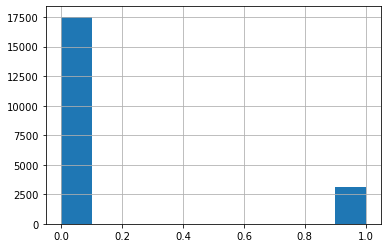

In [30]:
df.label_bnc.hist()

<a id="section2"></a>
## <font color="#004D7F">2. Filtrar</font>

### Validar o filtrar el DataFrame de datos que tenga  'cycle'=1

In [31]:
df1=df[df['cycle']==1]

In [39]:
df1.cycle.value_counts()

1    100
Name: cycle, dtype: int64

In [38]:
df1.cycle.unique()

array([1], dtype=int64)

In [35]:
df1.cycle.head(2)

0      0
192    0
Name: label_bnc, dtype: int64

In [40]:
df1

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21,av1,av2,av3,av4,av5,av6,av7,av8,av9,av10,av11,av12,av13,av14,av15,av16,av17,av18,av19,av20,av21,sd1,sd2,sd3,sd4,sd5,sd6,sd7,sd8,sd9,sd10,sd11,sd12,sd13,sd14,sd15,sd16,sd17,sd18,sd19,sd20,sd21,ttf,label_bnc,label_mcc
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,21.61,554.36,2388.06,9046.19,1.3,47.47,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,518.67,641.82,1589.70,1400.60,14.62,21.61,554.36,2388.06,9046.19,1.3,47.47,521.66,2388.02,8138.62,8.4195,0.03,392.0,2388.0,100.0,39.06,23.4190,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,191,0,0
192,2,1,-0.0018,0.0006,100.0,518.67,641.89,1583.84,1391.28,14.62,21.60,554.53,2388.01,9054.72,1.3,46.93,522.33,2388.06,8137.72,8.3905,0.03,391,2388,100.0,38.94,23.4585,518.67,641.89,1583.84,1391.28,14.62,21.60,554.53,2388.01,9054.72,1.3,46.93,522.33,2388.06,8137.72,8.3905,0.03,391.0,2388.0,100.0,38.94,23.4585,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,286,0,0
479,3,1,0.0008,0.0005,100.0,518.67,642.04,1584.20,1398.13,14.62,21.61,553.96,2388.06,9056.95,1.3,47.14,522.24,2388.00,8138.40,8.4207,0.03,391,2388,100.0,38.96,23.3205,518.67,642.04,1584.20,1398.13,14.62,21.61,553.96,2388.06,9056.95,1.3,47.14,522.24,2388.00,8138.40,8.4207,0.03,391.0,2388.0,100.0,38.96,23.3205,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,178,0,0
658,4,1,0.0025,0.0005,100.0,518.67,642.60,1585.40,1402.85,14.62,21.61,553.97,2388.06,9051.10,1.3,47.29,521.94,2388.07,8131.50,8.4200,0.03,393,2388,100.0,39.04,23.3814,518.67,642.60,1585.40,1402.85,14.62,21.61,553.97,2388.06,9051.10,1.3,47.29,521.94,2388.07,8131.50,8.4200,0.03,393.0,2388.0,100.0,39.04,23.3814,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,188,0,0
847,5,1,0.0031,0.0002,100.0,518.67,641.77,1583.59,1395.26,14.62,21.61,554.39,2387.98,9066.49,1.3,47.19,522.34,2388.00,8152.22,8.4102,0.03,393,2388,100.0,38.98,23.4468,518.67,641.77,1583.59,1395.26,14.62,21.61,554.39,2387.98,9066.49,1.3,47.19,522.34,2388.00,8152.22,8.4102,0.03,393.0,2388.0,100.0,38.98,23.4468,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,268,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19552,96,1,-0.0014,-0.0004,100.0,518.67,642.03,1579.12,1404.22,14.62,21.61,554.92,2388.11,9046.49,1.3,47.41,522.26,2388.06,8133.36,8.4293,0.03,392,2388,100.0,38.82,23.4178,518.67,642.03,1579.12,1404.22,14.62,21.61,554.92,2388.11,9046.49,1.3,47.41,522.26,2388.06,8133.36,8.4293,0.03,392.0,2388.0,100.0,38.82,23.4178,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,335,0,0
19888,97,1,-0.0038,0.0003,100.0,518.67,642.01,1581.83,1395.40,14.62,21.61,554.31,2388.04,9044.30,1.3,47.21,522.34,2388.05,8130.81,8.4027,0.03,391,2388,100.0,38.94,23.3732,518.67,642.01,1581.83,1395.40,14.62,21.61,554.31,2388.04,9044.30,1.3,47.21,522.34,2388.05,8130.81,8.4027,0.03,391.0,2388.0,100.0,38.94,23.3732,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,201,0,0
20090,98,1,0.0019,-0.0002,100.0,518.67,642.30,1580.93,1404.55,14.62,21.61,554.16,2388.00,9073.83,1.3,47.25,522.30,2387.97,8150.69,8.3792,0.03,392,2388,100.0,39.01,23.4547,518.67,642.30,1580.93,1404.55,14.62,21.61,554.16,2388.00,9073.83,1.3,47.25,522.30,2387.97,8150.69,8.3792,0.03,392.0,2388.0,100.0,39.01,23.4547,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,155,0,0
20246,99,1,0.0011,0.0005,100.0,518.67,641.69,1586.17,1391.14,14.62,21.61,554.09,2388.03,9064.32,1.3,47.41,522.65,2388.06,8131.23,8.4038,0.03,391,2388,100.

C:\Users\Luis\AppData\Local\Temp/ipykernel_796/1331506565.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df1.drop([],1).hist()


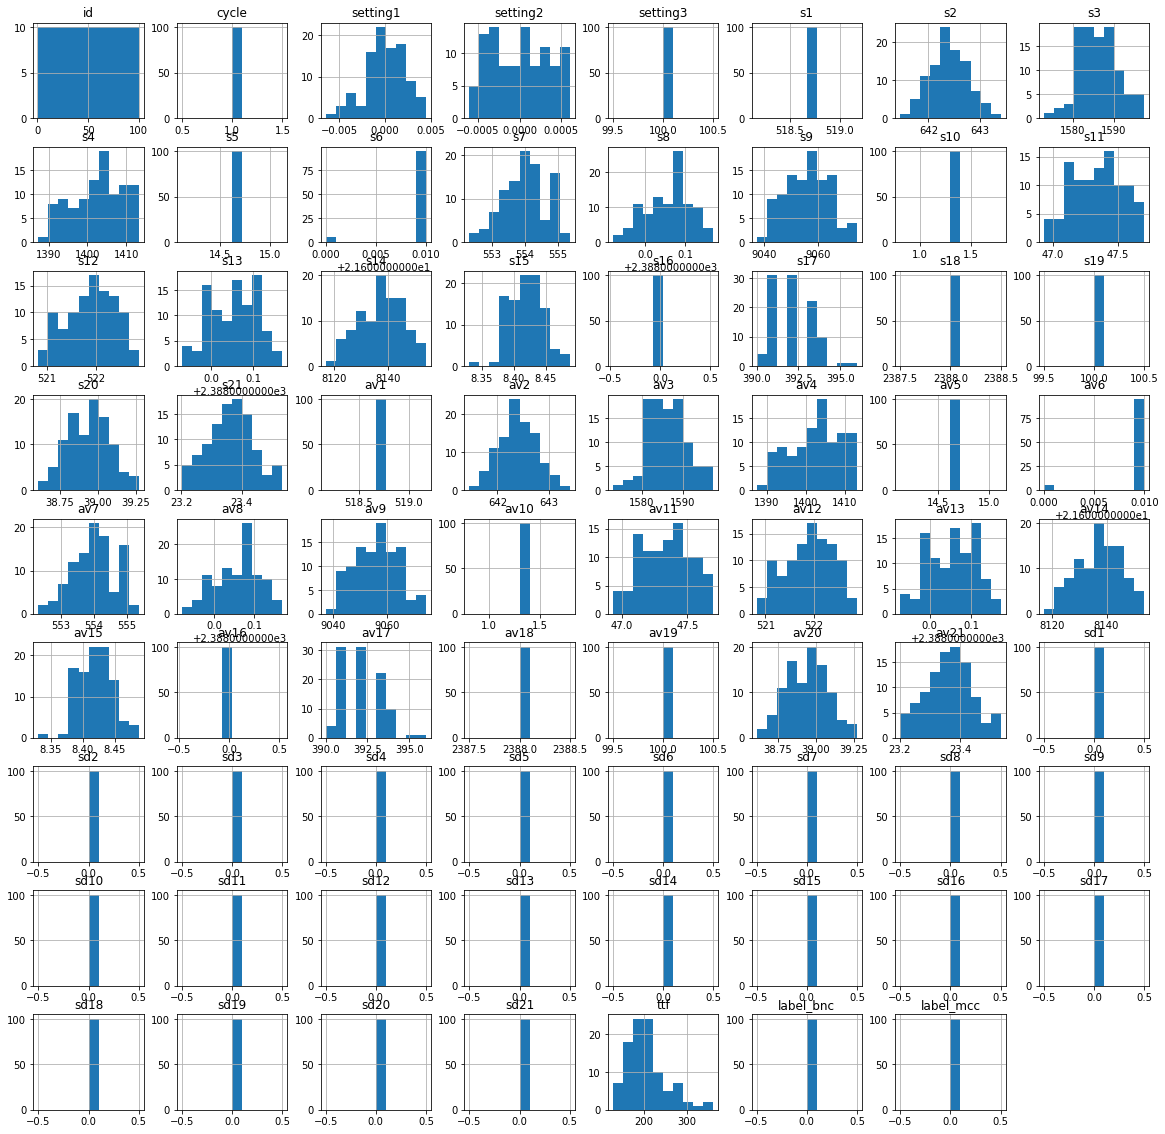

In [41]:
plt.rcParams["figure.figsize"]=[20,20]
df1.drop([],1).hist()
plt.show()

<a id="section3"></a>
## <font color="#004D7F">3. Reporte</font>

In [42]:
from pandas_profiling import ProfileReport

In [43]:
reporte=ProfileReport(df1,title="Reporte de Variables",explorative=True)

In [44]:
reporte.to_file("repaso_6 6.Cluster.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

C:\Users\Luis\AppData\Roaming\Python\Python39\site-packages\missingno\missingno.py:254: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(
C:\Users\Luis\AppData\Roaming\Python\Python39\site-packages\pandas_profiling\model\missing.py:89: UserWarning: There was an attempt to generate the Count missing values diagrams, but this failed.
To hide this warning, disable the calculation
(using `df.profile_report(missing_diagrams={"Count": False}`)
If this is problematic for your use case, please report this as an issue:
https://github.com/pandas-profiling/pandas-profiling/issues
(include the error message: 'The number of FixedLocator locations (7), usually from a call to set_ticks, does not match the number of ticklabels (72).')
  warnings.warn(


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### Limpiar el DataFrame para el proceso de 'KMeans'<br>
### Quitar nulos / vacios

In [46]:
df2=df1.dropna()

In [48]:
df2.shape

(100, 71)

### Reiniciar la secuencia de posiciones

In [49]:
df2=df2.reset_index(drop=True)
df2

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21,av1,av2,av3,av4,av5,av6,av7,av8,av9,av10,av11,av12,av13,av14,av15,av16,av17,av18,av19,av20,av21,sd1,sd2,sd3,sd4,sd5,sd6,sd7,sd8,sd9,sd10,sd11,sd12,sd13,sd14,sd15,sd16,sd17,sd18,sd19,sd20,sd21,ttf,label_bnc,label_mcc
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,21.61,554.36,2388.06,9046.19,1.3,47.47,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,518.67,641.82,1589.70,1400.60,14.62,21.61,554.36,2388.06,9046.19,1.3,47.47,521.66,2388.02,8138.62,8.4195,0.03,392.0,2388.0,100.0,39.06,23.4190,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,191,0,0
1,2,1,-0.0018,0.0006,100.0,518.67,641.89,1583.84,1391.28,14.62,21.60,554.53,2388.01,9054.72,1.3,46.93,522.33,2388.06,8137.72,8.3905,0.03,391,2388,100.0,38.94,23.4585,518.67,641.89,1583.84,1391.28,14.62,21.60,554.53,2388.01,9054.72,1.3,46.93,522.33,2388.06,8137.72,8.3905,0.03,391.0,2388.0,100.0,38.94,23.4585,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,286,0,0
2,3,1,0.0008,0.0005,100.0,518.67,642.04,1584.20,1398.13,14.62,21.61,553.96,2388.06,9056.95,1.3,47.14,522.24,2388.00,8138.40,8.4207,0.03,391,2388,100.0,38.96,23.3205,518.67,642.04,1584.20,1398.13,14.62,21.61,553.96,2388.06,9056.95,1.3,47.14,522.24,2388.00,8138.40,8.4207,0.03,391.0,2388.0,100.0,38.96,23.3205,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,178,0,0
3,4,1,0.0025,0.0005,100.0,518.67,642.60,1585.40,1402.85,14.62,21.61,553.97,2388.06,9051.10,1.3,47.29,521.94,2388.07,8131.50,8.4200,0.03,393,2388,100.0,39.04,23.3814,518.67,642.60,1585.40,1402.85,14.62,21.61,553.97,2388.06,9051.10,1.3,47.29,521.94,2388.07,8131.50,8.4200,0.03,393.0,2388.0,100.0,39.04,23.3814,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,188,0,0
4,5,1,0.0031,0.0002,100.0,518.67,641.77,1583.59,1395.26,14.62,21.61,554.39,2387.98,9066.49,1.3,47.19,522.34,2388.00,8152.22,8.4102,0.03,393,2388,100.0,38.98,23.4468,518.67,641.77,1583.59,1395.26,14.62,21.61,554.39,2387.98,9066.49,1.3,47.19,522.34,2388.00,8152.22,8.4102,0.03,393.0,2388.0,100.0,38.98,23.4468,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,268,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,1,-0.0014,-0.0004,100.0,518.67,642.03,1579.12,1404.22,14.62,21.61,554.92,2388.11,9046.49,1.3,47.41,522.26,2388.06,8133.36,8.4293,0.03,392,2388,100.0,38.82,23.4178,518.67,642.03,1579.12,1404.22,14.62,21.61,554.92,2388.11,9046.49,1.3,47.41,522.26,2388.06,8133.36,8.4293,0.03,392.0,2388.0,100.0,38.82,23.4178,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,335,0,0
96,97,1,-0.0038,0.0003,100.0,518.67,642.01,1581.83,1395.40,14.62,21.61,554.31,2388.04,9044.30,1.3,47.21,522.34,2388.05,8130.81,8.4027,0.03,391,2388,100.0,38.94,23.3732,518.67,642.01,1581.83,1395.40,14.62,21.61,554.31,2388.04,9044.30,1.3,47.21,522.34,2388.05,8130.81,8.4027,0.03,391.0,2388.0,100.0,38.94,23.3732,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,201,0,0
97,98,1,0.0019,-0.0002,100.0,518.67,642.30,1580.93,1404.55,14.62,21.61,554.16,2388.00,9073.83,1.3,47.25,522.30,2387.97,8150.69,8.3792,0.03,392,2388,100.0,39.01,23.4547,518.67,642.30,1580.93,1404.55,14.62,21.61,554.16,2388.00,9073.83,1.3,47.25,522.30,2387.97,8150.69,8.3792,0.03,392.0,2388.0,100.0,39.01,23.4547,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,155,0,0
98,99,1,0.0011,0.0005,100.0,518.67,641.69,1586.17,1391.14,14.62,21.61,554.09,2388.03,9064.32,1.3,47.41,522.65,2388.06,8131.23,8.4038,0.03,391,2388,100.0,39.01,23.4007,518.

### Eliminar variables 

In [52]:
df3=df2.drop(["ttf","label_bnc","label_mcc","id","cycle"],axis=1)
df3.head(2)

,setting1,setting2,setting3,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21,av1,av2,av3,av4,av5,av6,av7,av8,av9,av10,av11,av12,av13,av14,av15,av16,av17,av18,av19,av20,av21,sd1,sd2,sd3,sd4,sd5,sd6,sd7,sd8,sd9,sd10,sd11,sd12,sd13,sd14,sd15,sd16,sd17,sd18,sd19,sd20,sd21
0,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,21.61,554.36,2388.06,9046.19,1.3,47.47,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,518.67,641.82,1589.70,1400.60,14.62,21.61,554.36,2388.06,9046.19,1.3,47.47,521.66,2388.02,8138.62,8.4195,0.03,392.0,2388.0,100.0,39.06,23.4190,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.0018,0.0006,100.0,518.67,641.89,1583.84,1391.28,14.62,21.60,554.53,2388.01,9054.72,1.3,46.93,522.33,2388.06,8137.72,8.3905,0.03,391,2388,100.0,38.94,23.4585,518.67,641.89,1583.84,1391.28,14.62,21.60,554.53,2388.01,9054.72,1.3,46.93,522.33,2388.06,8137.72,8.3905,0.03,391.0,2388.0,100.0,38.94,23.4585,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [53]:
df3.shape

(100, 66)

In [54]:
df3.describe()

,setting1,setting2,setting3,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21,av1,av2,av3,av4,av5,av6,av7,av8,av9,av10,av11,av12,av13,av14,av15,av16,av17,av18,av19,av20,av21,sd1,sd2,sd3,sd4,sd5,sd6,sd7,sd8,sd9,sd10,sd11,sd12,sd13,sd14,sd15,sd16,sd17,sd18,sd19,sd20,sd21
count,100.000000,100.000000,100.0,1.000000e+02,100.000000,100.000000,100.000000,1.000000e+02,100.00000,100.000000,100.000000,100.000000,1.000000e+02,100.000000,100.000000,100.00000,100.000000,100.000000,1.000000e+02,100.000000,100.0,100.0,100.000000,100.000000,1.000000e+02,100.000000,100.000000,100.000000,1.000000e+02,100.00000,100.000000,100.000000,100.000000,1.000000e+02,100.000000,100.000000,100.00000,100.000000,100.000000,1.000000e+02,100.000000,100.0,100.0,100.000000,100.000000,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
mean,-0.000059,-0.000002,100.0,5.186700e+02,642.397200,1586.415700,1402.437900,1.462000e+01,21.60950,553.996100,2388.056700,9055.839500,1.300000e+00,47.342800,521.899400,2388.05410,8137.428000,8.419393,3.000000e-02,392.100000,2388.0,100.0,38.937800,23.363190,5.186700e+02,642.397200,1586.415700,1402.437900,1.462000e+01,21.60950,553.996100,2388.056700,9055.839500,1.300000e+00,47.342800,521.899400,2388.05410,8137.428000,8.419393,3.000000e-02,392.100000,2388.0,100.0,38.937800,23.363190,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,0.002194,0.000327,0.0,1.142596e-12,0.358096,4.755421,6.318299,2.856489e-14,0.00219,0.653956,0.054718,8.118081,1.785306e-15,0.189753,0.491084,0.05405,8.189765,0.026572,4.881696e-17,1.159066,0.0,0.0,0.137257,0.076972,1.142596e-12,0.358096,4.755421,6.318299,2.856489e-14,0.00219,0.653956,0.054718,8.118081,1.785306e-15,0.189753,0.491084,0.05405,8.189765,0.026572,4.881696e-17,1.159066,0.0,0.0,0.137257,0.076972,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,-0.006500,-0.000600,100.0,5.186700e+02,641.450000,1573.020000,1387.380000,1.462000e+01,21.60000,552.310000,2387.920000,9037.260000,1.300000e+00,46.930000,520.820000,2387.93000,8116.860000,8.330300,3.000000e-02,390.000000,2388.0,100.0,38.610000,23.201700,5.186700e+02,641.450000,1573.020000,1387.380000,1.462000e+01,21.60000,552.310000,2387.920000,9037.260000,1.300000e+00,46.930000,520.820000,2387.93000,8116.860000,8.330300,3.000000e-02,390.000000,2388.0,100.0,38.610000,23.201700,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,-0.001400,-0.000300,100.0,5.186700e+02,642.180000,1582.820000,1397.692500,1.462000e+01,21.61000,553.557500,2388.017500,9050.097500,1.300000e+00,47.190000,521.517500,2388.01000,8131.447500,8.402525,3.000000e-02,391.000000,2388.0,100.0,38.837500,23.314650,5.186700e+02,642.180000,1582.820000,1397.692500,1.462000e+01,21.61000,553.557500,2388.017500,9050.097500,1.300000e+00,47.190000,521.517500,2388.01000,8131.447500,8.402525,3.000000e-02,391.000000,2388.0,100.0,38.837500,23.314650,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.000000,-0.000000,100.0,5.186700e+02,642.375000,1586.355000,1403.175000,1.462000e+01,21.61000,554.025000,2388.070000,9055.875000,1.300000e+00,47.360000,521.935000,2388.06000,8138.130000,8.419250,3.000000e-02,392.000000,2388.0,100.0,38.940000,23.366200,5.186700e+02,642.375000,1586.355000,1403.175000,1.462000e+01,21.61000,554.025000,2388.070000,9055.875000,1.300000e+00,47.360000,521.935000,2388.06000,8138.130000,8.419250,3.000000e-02,392.000000,2388.0,100.0,38.940000,23.366200,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,0.001600,0.000300,100.0,5.186700e+02,642.642500,1589.742500,1407.772500,1.462000e+01,21.61000,554.412500,2388.092500,9061.422500,1.300000e+00,47.475000,522.292500,2388.10000,8143.650000,8.437400,3.000000e-02,393.000000,2388.0,100.0,39.030000,23.409900,5.186700e+02,642.642500,1589.742500,1407.772500,1.462000e+0

In [55]:
df3.shape

(100, 66)

<a id="section31"></a>
## <font color="#004D7F">3.1 Grafica de desviacion</font>

<AxesSubplot:title={'center':'variables con sd'}>

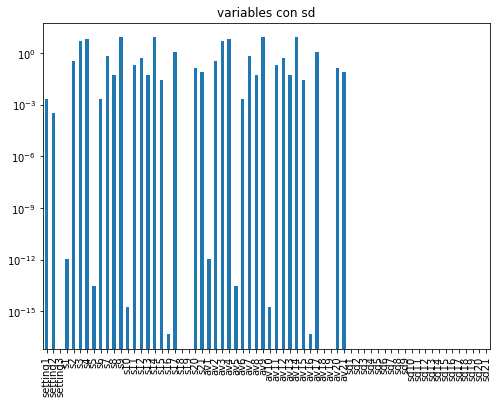

In [57]:
df3.std().plot(kind='bar',figsize=(8,6),logy=True,title='variables con sd')

In [58]:
top_std=df3.std().sort_values(ascending=False)

<a id="section32"></a>
## <font color="#004D7F">3.2 Visualizando las filas y columnas-> completo</font>

 Visualizando de forma numerica  : _ :<br><br>filas:      pd.set_option("display.max_rows",None) <br><br>columnas:        pd.set_option("display.max_columns",None)

In [91]:
###visualizando filas:
pd.set_option("display.max_rows",None)###          display.max_columns

In [61]:
top_std

av14        8.189765e+00
s14         8.189765e+00
av9         8.118081e+00
s9          8.118081e+00
av4         6.318299e+00
s4          6.318299e+00
s3          4.755421e+00
av3         4.755421e+00
s17         1.159066e+00
av17        1.159066e+00
av7         6.539559e-01
s7          6.539559e-01
s12         4.910838e-01
av12        4.910838e-01
av2         3.580956e-01
s2          3.580956e-01
av11        1.897531e-01
s11         1.897531e-01
av20        1.372573e-01
s20         1.372573e-01
av21        7.697229e-02
s21         7.697229e-02
s8          5.471792e-02
av8         5.471792e-02
av13        5.405001e-02
s13         5.405001e-02
s15         2.657187e-02
av15        2.657187e-02
setting1    2.194350e-03
av6         2.190429e-03
s6          2.190429e-03
setting2    3.272104e-04
s1          1.142596e-12
av1         1.142596e-12
s5          2.856489e-14
av5         2.856489e-14
av10        1.785306e-15
s10         1.785306e-15
av16        4.881696e-17
s16         4.881696e-17


### Variables que almenos tienen aportan variabilidad

In [80]:
[top_std> 3.272104e-04]

[av14         True
 s14          True
 av9          True
 s9           True
 av4          True
 s4           True
 s3           True
 av3          True
 s17          True
 av17         True
 av7          True
 s7           True
 s12          True
 av12         True
 av2          True
 s2           True
 av11         True
 s11          True
 av20         True
 s20          True
 av21         True
 s21          True
 s8           True
 av8          True
 av13         True
 s13          True
 s15          True
 av15         True
 setting1     True
 av6          True
 s6           True
 setting2     True
 s1          False
 av1         False
 s5          False
 av5         False
 av10        False
 s10         False
 av16        False
 s16         False
 s19         False
 sd9         False
 sd20        False
 sd19        False
 sd18        False
 sd17        False
 sd16        False
 sd15        False
 sd14        False
 sd13        False
 sd12        False
 sd11        False
 sd10       

### Variables seleccionadas

In [85]:
lista=['av14'         ,
 's14'          ,
 'av9'          ,
 's9'           ,
 'av4'          ,
 's4'           ,
 's3'           ,
 'av3'          ,
 's17'          ,
 'av17'         ,
 'av7'          ,
 's7'           ,
 's12'          ,
 'av12'         ,
 'av2'        ,
 's2'           ,
 'av11'         ,
 's11'          ,
 'av20'         ,
 's20'          ,
 'av21'         ,
 's21'          ,
 's8'           ,
 'av8'          ,
 'av13'         ,
 's13'          ,
 's15'          ,
 'av15'         ,
 'setting1'     ,
 'av6'          ,
 's6'           ,
 'setting2'     ] 

In [88]:
df4=df3[lista]

In [89]:
df4.shape

(100, 32)

### Grafica de Desviacion con las variables seleccionadas

#### Estas variables tienen algo de variabilidad

<AxesSubplot:title={'center':'variables con sd'}>

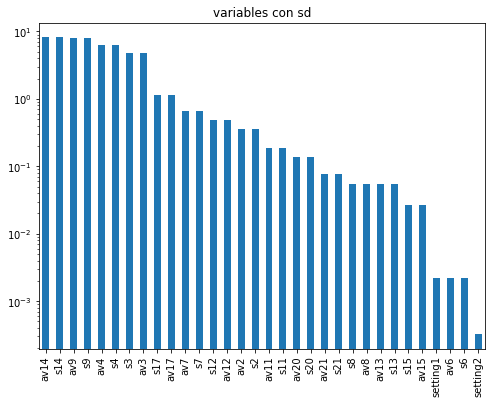

In [90]:
df4.std().plot(kind='bar',figsize=(8,6),logy=True,title='variables con sd')

In [92]:
df4.head(10)

,av14,s14,av9,s9,av4,s4,s3,av3,s17,av17,av7,s7,s12,av12,av2,s2,av11,s11,av20,s20,av21,s21,s8,av8,av13,s13,s15,av15,setting1,av6,s6,setting2
0,8138.62,8138.62,9046.19,9046.19,1400.60,1400.60,1589.70,1589.70,392,392.0,554.36,554.36,521.66,521.66,641.82,641.82,47.47,47.47,39.06,39.06,23.4190,23.4190,2388.06,2388.06,2388.02,2388.02,8.4195,8.4195,-0.0007,21.61,21.61,-0.0004
1,8137.72,8137.72,9054.72,9054.72,1391.28,1391.28,1583.84,1583.84,391,391.0,554.53,554.53,522.33,522.33,641.89,641.89,46.93,46.93,38.94,38.94,23.4585,23.4585,2388.01,2388.01,2388.06,2388.06,8.3905,8.3905,-0.0018,21.60,21.60,0.0006
2,8138.40,8138.40,9056.95,9056.95,1398.13,1398.13,1584.20,1584.20,391,391.0,553.96,553.96,522.24,522.24,642.04,642.04,47.14,47.14,38.96,38.96,23.3205,23.3205,2388.06,2388.06,2388.00,2388.00,8.4207,8.4207,0.0008,21.61,21.61,0.0005
3,8131.50,8131.50,9051.10,9051.10,1402.85,1402.85,1585.40,1585.40,393,393.0,553.97,553.97,521.94,521.94,642.60,642.60,47.29,47.29,39.04,39.04,23.3814,23.3814,2388.06,2388.06,2388.07,2388.07,8.4200,8.4200,0.0025,21.61,21.61,0.0005
4,8152.22,8152.22,9066.49,9066.49,1395.26,1395.26,1583.59,1583.59,393,393.0,554.39,554.39,522.34,522.34,641.77,641.77,47.19,47.19,38.98,38.98,23.4468,23.4468,2387.98,2387.98,2388.00,2388.00,8.4102,8.4102,0.0031,21.61,21.61,0.0002
5,8116.86,8116.86,9037.26,9037.26,1412.34,1412.34,1584.40,1584.40,394,394.0,552.99,552.99,521.69,521.69,642.73,642.73,47.56,47.56,38.94,38.94,23.3086,23.3086,2388.12,2388.12,2388.12,2388.12,8.4286,8.4286,-0.0019,21.61,21.61,0.0003
6,8141.69,8141.69,9071.27,9071.27,1395.48,1395.48,1589.49,1589.49,390,390.0,554.76,554.76,522.19,522.19,642.38,642.38,47.24,47.24,38.97,38.97,23.4073,23.4073,2387.97,2387.97,2387.99,2387.99,8.4081,8.4081,-0.0005,21.61,21.61,0.0004
7,8123.47,8123.47,9048.66,9048.66,1409.75,1409.75,1585.17,1585.17,393,393.0,552.31,552.31,521.23,521.23,643.18,643.18,47.30,47.30,38.90,38.90,23.3468,23.3468,2388.12,2388.12,2388.13,2388.13,8.4808,8.4808,-0.0026,21.61,21.61,-0.0003
8,8149.16,8149.16,9065.59,9065.59,1396.22,1396.22,1582.99,1582.99,391,391.0,554.35,554.35,522.34,522.34,642.18,642.18,47.09,47.09,39.04,39.04,23.5349,23.5349,2387.96,2387.96,2387.95,2387.95,8.4020,8.4020,0.0005,21.61,21.61,0.0004
9,8137.61,8137.61,9051.46,9051.46,1392.20,1392.20,1587.93,1587.93,391,391.0,554.37,554.37,522.54,522.54,641.92,641.92,47.05,47.05,39.04,39.04,23.5309,23.5309,2388.00,2388.00,2388.01,2388.01,8.4039,8.4039,-0.0014,21.61,21.61,0.0004


<a id="section4"></a>
## <font color="#004D7F">4. Escalamiento</font>

<a id="section41"></a>
## <font color="#004D7F">4.1 Escalamiento por MiN-Max</font>

### Escalamiento->fx es llevar a las variables en un mismo rango   

In [93]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 32 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   av14      100 non-null    float64
 1   s14       100 non-null    float64
 2   av9       100 non-null    float64
 3   s9        100 non-null    float64
 4   av4       100 non-null    float64
 5   s4        100 non-null    float64
 6   s3        100 non-null    float64
 7   av3       100 non-null    float64
 8   s17       100 non-null    int64  
 9   av17      100 non-null    float64
 10  av7       100 non-null    float64
 11  s7        100 non-null    float64
 12  s12       100 non-null    float64
 13  av12      100 non-null    float64
 14  av2       100 non-null    float64
 15  s2        100 non-null    float64
 16  av11      100 non-null    float64
 17  s11       100 non-null    float64
 18  av20      100 non-null    float64
 19  s20       100 non-null    float64
 20  av21      100 non-null    float64

<a id="section411"></a>
## <font color="#004D7F">4.1.1 El escalador</font>

In [94]:
min_max_escalamiento=preprocessing.MinMaxScaler()

<a id="section412"></a>
## <font color="#004D7F">4.1.2 Ajustar</font>

In [95]:
df4_escalado=min_max_escalamiento.fit_transform(df4)

<a id="section413"></a>
## <font color="#004D7F">4.1.3 Crear un DataFrame</font>


In [96]:
df5=pd.DataFrame(df4_escalado)

In [98]:
df5.head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
0,0.587632,0.587632,0.241809,0.241809,0.512006,0.512006,0.684729,0.684729,0.333333,0.333333,0.669935,0.669935,0.407767,0.407767,0.188776,0.188776,0.701299,0.701299,0.681818,0.681818,0.652161,0.652161,0.56,0.56,0.375000,0.375000,0.567430,0.567430,0.527273,1.0,1.0,0.166667
1,0.563327,0.563327,0.472786,0.472786,0.151046,0.151046,0.444171,0.444171,0.166667,0.166667,0.725490,0.725490,0.733010,0.733010,0.224490,0.224490,0.000000,0.000000,0.500000,0.500000,0.770708,0.770708,0.36,0.36,0.541667,0.541667,0.382952,0.382952,0.427273,0.0,0.0,1.000000


In [99]:
df5.shape

(100, 32)

<a id="section414"></a>
## <font color="#004D7F">4.1.4 Renombrar</font>

In [101]:
df5=df5.rename(columns={0:"v1",1:"v2",2:"v3",3:"v4",4:"v5",5:"v6",6:"v7",7:"v8",8:"v9",9:"v10",10:"v11",11:"v12",12:"v13",13:"v14",14:"v15",15:"v16",16:"v17",17:"v18",18:"v19",19:"v20",20:"v21",21:"v22",22:"v23",23:"v24",24:"v25",25:"v26",26:"v27",27:"v28",28:"v29",29:"v30",30:"v31",31:"v32",32:"v33"})

In [102]:
df5

,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v20,v21,v22,v23,v24,v25,v26,v27,v28,v29,v30,v31,v32
0,0.587632,0.587632,0.241809,0.241809,0.512006,0.512006,0.684729,0.684729,0.333333,0.333333,0.669935,0.669935,0.407767,0.407767,0.188776,0.188776,0.701299,0.701299,0.681818,0.681818,0.652161,0.652161,0.56,0.56,0.375000,0.375000,0.567430,0.567430,0.527273,1.0,1.0,0.166667
1,0.563327,0.563327,0.472786,0.472786,0.151046,0.151046,0.444171,0.444171,0.166667,0.166667,0.725490,0.725490,0.733010,0.733010,0.224490,0.224490,0.000000,0.000000,0.500000,0.500000,0.770708,0.770708,0.36,0.36,0.541667,0.541667,0.382952,0.382952,0.427273,0.0,0.0,1.000000
2,0.581691,0.581691,0.533171,0.533171,0.416344,0.416344,0.458949,0.458949,0.166667,0.166667,0.539216,0.539216,0.689320,0.689320,0.301020,0.301020,0.272727,0.272727,0.530303,0.530303,0.356543,0.356543,0.56,0.56,0.291667,0.291667,0.575064,0.575064,0.663636,1.0,1.0,0.916667
3,0.395355,0.395355,0.374763,0.374763,0.599148,0.599148,0.508210,0.508210,0.500000,0.500000,0.542484,0.542484,0.543689,0.543689,0.586735,0.586735,0.467532,0.467532,0.651515,0.651515,0.539316,0.539316,0.56,0.56,0.583333,0.583333,0.570611,0.570611,0.818182,1.0,1.0,0.916667
4,0.954901,0.954901,0.791497,0.791497,0.305190,0.305190,0.433908,0.433908,0.500000,0.500000,0.679739,0.679739,0.737864,0.737864,0.163265,0.163265,0.337662,0.337662,0.560606,0.560606,0.735594,0.735594,0.24,0.24,0.291667,0.291667,0.508270,0.508270,0.872727,1.0,1.0,0.666667
5,0.000000,0.000000,0.000000,0.000000,0.966692,0.966692,0.467159,0.467159,0.666667,0.666667,0.222222,0.222222,0.422330,0.422330,0.653061,0.653061,0.818182,0.818182,0.500000,0.500000,0.320828,0.320828,0.80,0.80,0.791667,0.791667,0.625318,0.625318,0.418182,1.0,1.0,0.750000
6,0.670537,0.670537,0.920931,0.920931,0.313710,0.313710,0.676108,0.676108,0.000000,0.000000,0.800654,0.800654,0.665049,0.665049,0.474490,0.474490,0.402597,0.402597,0.545455,0.545455,0.617047,0.617047,0.20,0.20,0.250000,0.250000,0.494911,0.494911,0.545455,1.0,1.0,0.833333
7,0.178504,0.178504,0.308692,0.308692,0.866383,0.866383,0.498768,0.498768,0.500000,0.500000,0.000000,0.000000,0.199029,0.199029,0.882653,0.882653,0.480519,0.480519,0.439394,0.439394,0.435474,0.435474,0.80,0.80,0.833333,0.833333,0.957379,0.957379,0.354545,1.0,1.0,0.250000
8,0.872266,0.872266,0.767127,0.767127,0.342370,0.342370,0.409278,0.409278,0.166667,0.166667,0.666667,0.666667,0.737864,0.737864,0.372449,0.372449,0.207792,0.207792,0.651515,0.651515,1.000000,1.000000,0.16,0.16,0.083333,0.083333,0.456107,0.456107,0.636364,1.0,1.0,0.833333
9,0.560356,0.560356,0.384511,0.384511,0.186677,0.186677,0.612069,0.612069,0.166667,0.166667,0.673203,0.673203,0.834951,0.834951,0.239796,0.239796,0.155844,0.155844,0.651515,0.651515,0.987995,0.987995,0.32,0.32,0.333333,0.333333,0.468193,0.468193,0.463636,1.0,1.0,0.833333


### Grafico de dispersion de 2 variables 

In [104]:
df5.columns

Index(['v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8', 'v9', 'v10', 'v11',
       'v12', 'v13', 'v14', 'v15', 'v16', 'v17', 'v18', 'v19', 'v20', 'v21',
       'v22', 'v23', 'v24', 'v25', 'v26', 'v27', 'v28', 'v29', 'v30', 'v31',
       'v32'],
      dtype='object')

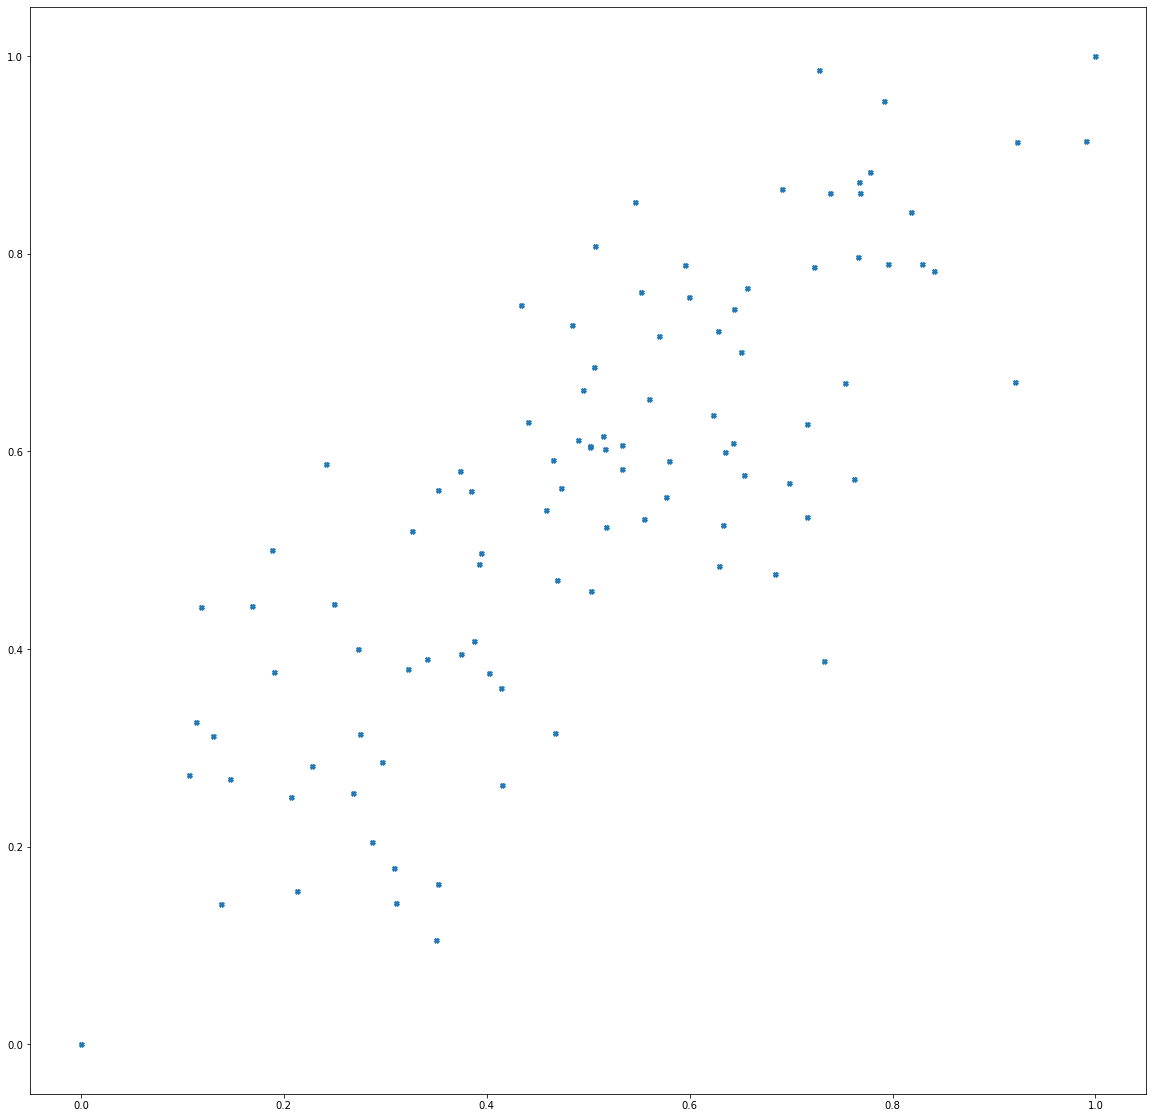

In [108]:
x1=df5['v4'].values
x2=df5['v2'].values
plt.plot(x1,x2,"X",markersize=5)

<a id="section5"></a>
## <font color="#004D7F">5. Aplicando KMeans</font>

### Saber el numero de k (cluster)

### Numero de iteracciones   'numero_intercciones'

In [110]:
numero_intercciones=range(1,30)

In [112]:
kmeans=[KMeans(n_clusters=i) for i in numero_intercciones]

In [113]:
len(numero_intercciones)### numero de iteracciones --> cohesion y separacion

29

In [115]:
score=[kmeans[i].fit(df5).score(df5) for i in range(len(kmeans))]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


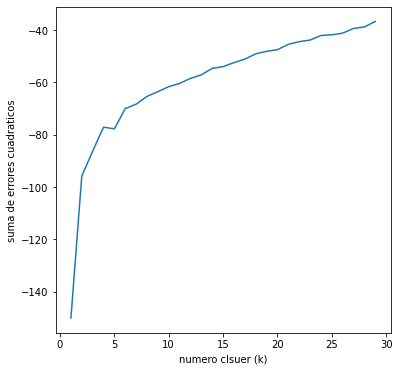

In [116]:
plt.rcParams["figure.figsize"] = [6,6]
plt.xlabel("numero clsuer (k)")
plt.ylabel("suma de errores cuadraticos")
plt.plot(numero_intercciones,score)

### Numero de iteraccione  : 29  con cluster : 5

### 1.Ajustar

In [117]:
kmeans=KMeans(n_clusters=5).fit(df5)

### 2.Centroides

In [124]:
### Hay 5 cluster por lo tanto tenemos 32 centroides por las 32 variables
centroides=kmeans.cluster_centers_
centroides

array([[ 8.04062772e-01,  8.04062772e-01,  7.69007431e-01,
         7.69007431e-01,  4.93953869e-01,  4.93953869e-01,
         4.52266922e-01,  4.52266922e-01,  2.40740741e-01,
         2.40740741e-01,  7.09513435e-01,  7.09513435e-01,
         7.01995685e-01,  7.01995685e-01,  3.54024943e-01,
         3.54024943e-01,  3.32611833e-01,  3.32611833e-01,
         7.20538721e-01,  7.20538721e-01,  6.68267307e-01,
         6.68267307e-01,  2.91111111e-01,  2.91111111e-01,
         2.31481481e-01,  2.31481481e-01,  3.84153237e-01,
         3.84153237e-01,  6.36868687e-01,  1.00000000e+00,
         1.00000000e+00,  5.13888889e-01],
       [ 3.19231808e-01,  3.19231808e-01,  3.27001187e-01,
         3.27001187e-01,  8.08973366e-01,  8.08973366e-01,
         6.49693697e-01,  6.49693697e-01,  4.93589744e-01,
         4.93589744e-01,  3.36098542e-01,  3.36098542e-01,
         2.94062733e-01,  2.94062733e-01,  6.20682889e-01,
         6.20682889e-01,  7.93206793e-01,  7.93206793e-01,
         3.31

In [123]:
df5.shape

(100, 32)

<a id="section51"></a>
## <font color="#004D7F">5.1 Prediccion de KMeans</font>

In [126]:
etiqueta=kmeans.predict(df5)
df5['y_predicho']=etiqueta

In [127]:
df5.head(5)

,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v20,v21,v22,v23,v24,v25,v26,v27,v28,v29,v30,v31,v32,y_predicho
0,0.587632,0.587632,0.241809,0.241809,0.512006,0.512006,0.684729,0.684729,0.333333,0.333333,0.669935,0.669935,0.407767,0.407767,0.188776,0.188776,0.701299,0.701299,0.681818,0.681818,0.652161,0.652161,0.56,0.56,0.375000,0.375000,0.567430,0.567430,0.527273,1.0,1.0,0.166667,2
1,0.563327,0.563327,0.472786,0.472786,0.151046,0.151046,0.444171,0.444171,0.166667,0.166667,0.725490,0.725490,0.733010,0.733010,0.224490,0.224490,0.000000,0.000000,0.500000,0.500000,0.770708,0.770708,0.36,0.36,0.541667,0.541667,0.382952,0.382952,0.427273,0.0,0.0,1.000000,3
2,0.581691,0.581691,0.533171,0.533171,0.416344,0.416344,0.458949,0.458949,0.166667,0.166667,0.539216,0.539216,0.689320,0.689320,0.301020,0.301020,0.272727,0.272727,0.530303,0.530303,0.356543,0.356543,0.56,0.56,0.291667,0.291667,0.575064,0.575064,0.663636,1.0,1.0,0.916667,4
3,0.395355,0.395355,0.374763,0.374763,0.599148,0.599148,0.508210,0.508210,0.500000,0.500000,0.542484,0.542484,0.543689,0.543689,0.586735,0.586735,0.467532,0.467532,0.651515,0.651515,0.539316,0.539316,0.56,0.56,0.583333,0.583333,0.570611,0.570611,0.818182,1.0,1.0,0.916667,2
4,0.954901,0.954901,0.791497,0.791497,0.305190,0.305190,0.433908,0.433908,0.500000,0.500000,0.679739,0.679739,0.737864,0.737864,0.163265,0.163265,0.337662,0.337662,0.560606,0.560606,0.735594,0.735594,0.24,0.24,0.291667,0.291667,0.508270,0.508270,0.872727,1.0,1.0,0.666667,0


<a id="section511"></a>
## <font color="#004D7F">5.1.1 Crear nuevos datos</font> 

In [142]:
df5.columns

Index(['v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8', 'v9', 'v10', 'v11',
       'v12', 'v13', 'v14', 'v15', 'v16', 'v17', 'v18', 'v19', 'v20', 'v21',
       'v22', 'v23', 'v24', 'v25', 'v26', 'v27', 'v28', 'v29', 'v30', 'v31',
       'v32', 'y_predicho'],
      dtype='object')

In [171]:
df6=df5.head(5)

In [172]:
df6

,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v20,v21,v22,v23,v24,v25,v26,v27,v28,v29,v30,v31,v32,y_predicho
0,0.587632,0.587632,0.241809,0.241809,0.512006,0.512006,0.684729,0.684729,0.333333,0.333333,0.669935,0.669935,0.407767,0.407767,0.188776,0.188776,0.701299,0.701299,0.681818,0.681818,0.652161,0.652161,0.56,0.56,0.375000,0.375000,0.567430,0.567430,0.527273,1.0,1.0,0.166667,2
1,0.563327,0.563327,0.472786,0.472786,0.151046,0.151046,0.444171,0.444171,0.166667,0.166667,0.725490,0.725490,0.733010,0.733010,0.224490,0.224490,0.000000,0.000000,0.500000,0.500000,0.770708,0.770708,0.36,0.36,0.541667,0.541667,0.382952,0.382952,0.427273,0.0,0.0,1.000000,3
2,0.581691,0.581691,0.533171,0.533171,0.416344,0.416344,0.458949,0.458949,0.166667,0.166667,0.539216,0.539216,0.689320,0.689320,0.301020,0.301020,0.272727,0.272727,0.530303,0.530303,0.356543,0.356543,0.56,0.56,0.291667,0.291667,0.575064,0.575064,0.663636,1.0,1.0,0.916667,4
3,0.395355,0.395355,0.374763,0.374763,0.599148,0.599148,0.508210,0.508210,0.500000,0.500000,0.542484,0.542484,0.543689,0.543689,0.586735,0.586735,0.467532,0.467532,0.651515,0.651515,0.539316,0.539316,0.56,0.56,0.583333,0.583333,0.570611,0.570611,0.818182,1.0,1.0,0.916667,2
4,0.954901,0.954901,0.791497,0.791497,0.305190,0.305190,0.433908,0.433908,0.500000,0.500000,0.679739,0.679739,0.737864,0.737864,0.163265,0.163265,0.337662,0.337662,0.560606,0.560606,0.735594,0.735594,0.24,0.24,0.291667,0.291667,0.508270,0.508270,0.872727,1.0,1.0,0.666667,0


In [173]:
df6.y_predicho

0    2
1    3
2    4
3    2
4    0
Name: y_predicho, dtype: int32

In [174]:
df6.columns

Index(['v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8', 'v9', 'v10', 'v11',
       'v12', 'v13', 'v14', 'v15', 'v16', 'v17', 'v18', 'v19', 'v20', 'v21',
       'v22', 'v23', 'v24', 'v25', 'v26', 'v27', 'v28', 'v29', 'v30', 'v31',
       'v32', 'y_predicho'],
      dtype='object')

In [175]:
lista1=['v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8', 'v9', 'v10', 'v11',
       'v12', 'v13', 'v14', 'v15', 'v16', 'v17', 'v18', 'v19', 'v20', 'v21',
       'v22', 'v23', 'v24', 'v25', 'v26', 'v27', 'v28', 'v29', 'v30', 'v31',
       'v32']

In [176]:
df7=df6[lista1]
df7

,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v20,v21,v22,v23,v24,v25,v26,v27,v28,v29,v30,v31,v32
0,0.587632,0.587632,0.241809,0.241809,0.512006,0.512006,0.684729,0.684729,0.333333,0.333333,0.669935,0.669935,0.407767,0.407767,0.188776,0.188776,0.701299,0.701299,0.681818,0.681818,0.652161,0.652161,0.56,0.56,0.375000,0.375000,0.567430,0.567430,0.527273,1.0,1.0,0.166667
1,0.563327,0.563327,0.472786,0.472786,0.151046,0.151046,0.444171,0.444171,0.166667,0.166667,0.725490,0.725490,0.733010,0.733010,0.224490,0.224490,0.000000,0.000000,0.500000,0.500000,0.770708,0.770708,0.36,0.36,0.541667,0.541667,0.382952,0.382952,0.427273,0.0,0.0,1.000000
2,0.581691,0.581691,0.533171,0.533171,0.416344,0.416344,0.458949,0.458949,0.166667,0.166667,0.539216,0.539216,0.689320,0.689320,0.301020,0.301020,0.272727,0.272727,0.530303,0.530303,0.356543,0.356543,0.56,0.56,0.291667,0.291667,0.575064,0.575064,0.663636,1.0,1.0,0.916667
3,0.395355,0.395355,0.374763,0.374763,0.599148,0.599148,0.508210,0.508210,0.500000,0.500000,0.542484,0.542484,0.543689,0.543689,0.586735,0.586735,0.467532,0.467532,0.651515,0.651515,0.539316,0.539316,0.56,0.56,0.583333,0.583333,0.570611,0.570611,0.818182,1.0,1.0,0.916667
4,0.954901,0.954901,0.791497,0.791497,0.305190,0.305190,0.433908,0.433908,0.500000,0.500000,0.679739,0.679739,0.737864,0.737864,0.163265,0.163265,0.337662,0.337662,0.560606,0.560606,0.735594,0.735594,0.24,0.24,0.291667,0.291667,0.508270,0.508270,0.872727,1.0,1.0,0.666667


In [177]:
prediccion=kmeans.predict(df7)

In [178]:
prediccion

array([2, 3, 4, 2, 0])